# End-to-End Machine Learning Project


## 1. Exploratory Data Analysis (EDA)

#### - Check dataset shape, data types, missing values, and unique values.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\madhu\Downloads\synthetic_dataset_10000x20.csv")

In [6]:
df.head()

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0
3,CUST004743,49,29049.0,6284.0,2485.0,1,707.477864,20881.0,36,2.7,...,HS,Married,South,0,1,2018-04-22,6,0.719,-0.982453,0
4,CUST004522,74,60063.0,924.0,3179.0,2,564.768511,19438.0,36,10.3,...,Masters,Single,West,0,0,2019-12-03,1,0.324,0.898708,1


In [7]:
df.shape

(10000, 21)

In [8]:
df.dtypes

customer_id             object
age                      int64
income                 float64
savings                float64
monthly_expenses       float64
num_dependents           int64
credit_score           float64
loan_amount            float64
loan_term_months         int64
employment_years       float64
home_ownership          object
education               object
marital_status          object
region                  object
recent_default           int64
has_credit_card          int64
signup_date             object
signup_dayofweek         int64
debt_to_income         float64
sin_age                float64
target_default_risk      int64
dtype: object

In [9]:
df.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

In [10]:
df.nunique(axis = 0)

customer_id            10000
age                       57
income                  9107
savings                 6498
monthly_expenses        3068
num_dependents             8
credit_score            9647
loan_amount             7999
loan_term_months           6
employment_years         182
home_ownership             4
education                  6
marital_status             4
region                     4
recent_default             2
has_credit_card            2
signup_date             1982
signup_dayofweek           7
debt_to_income          1261
sin_age                   57
target_default_risk        2
dtype: int64

#### - Plot distributions of numeric features (histograms, boxplots).

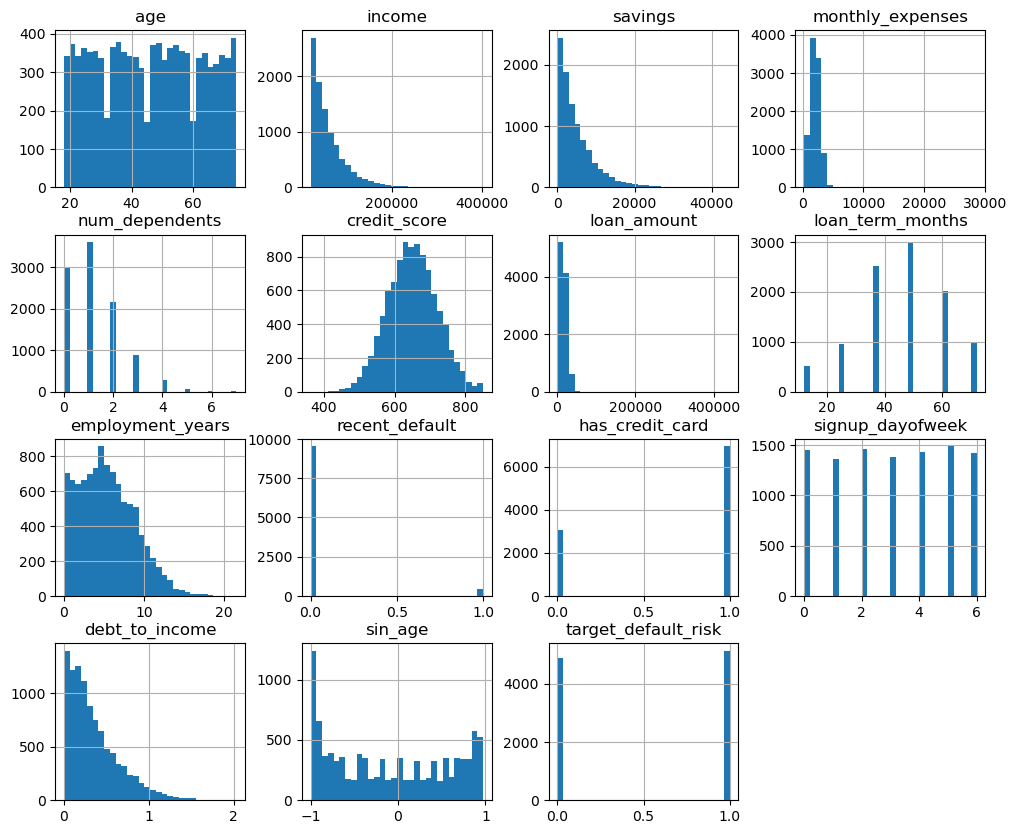

In [12]:
# Histograms for all numeric features
df.hist(figsize=(12, 10), bins=30)
plt.show()

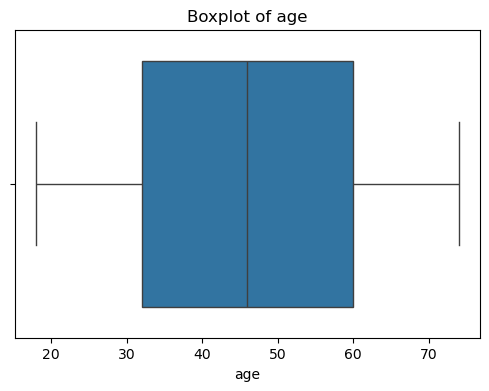

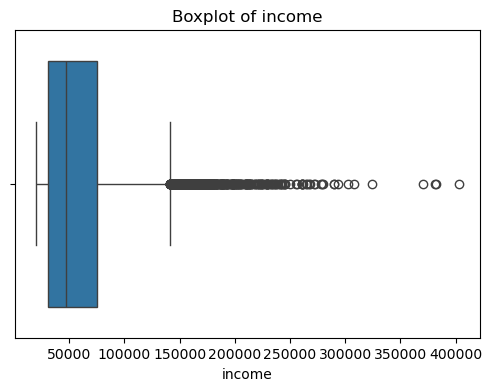

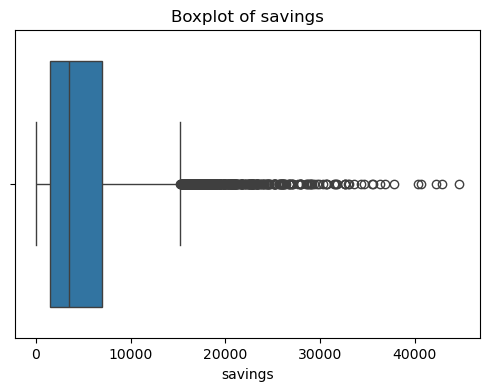

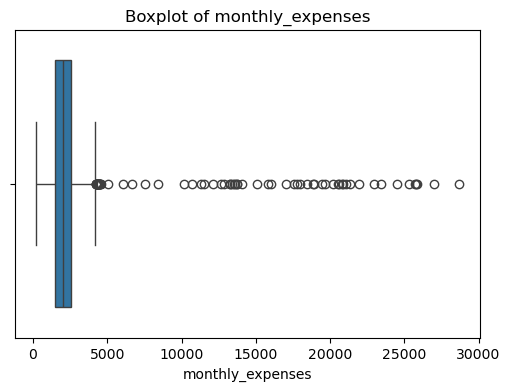

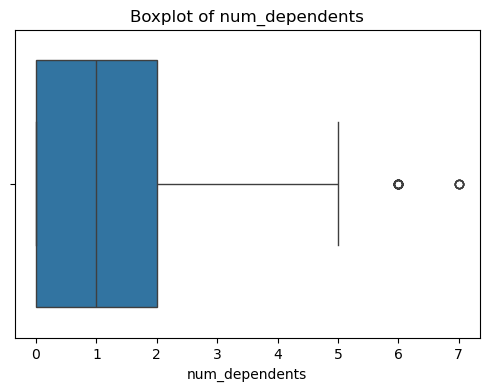

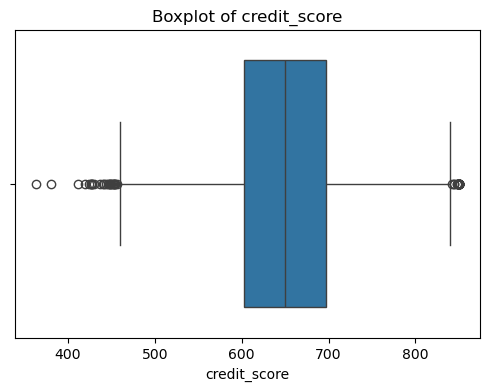

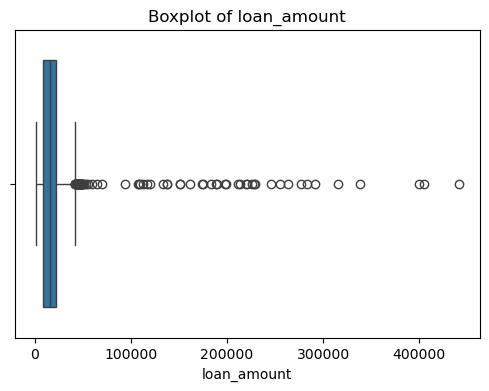

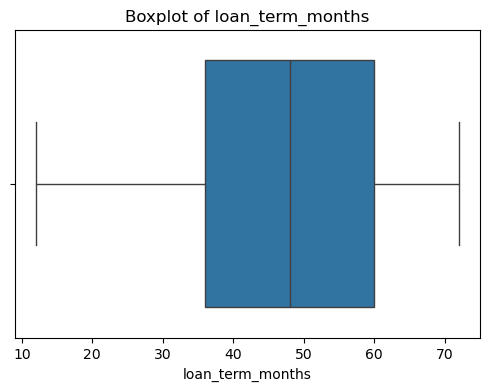

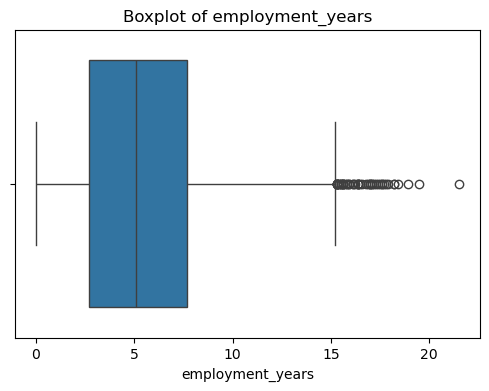

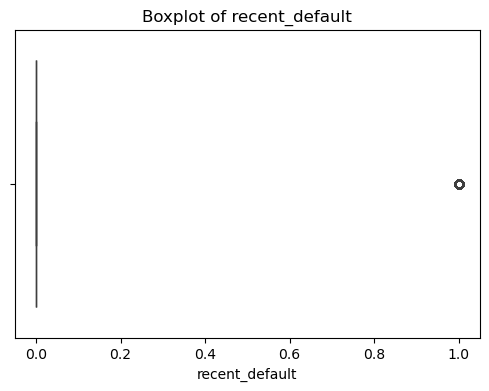

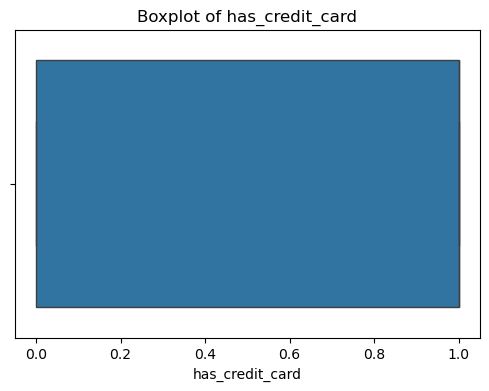

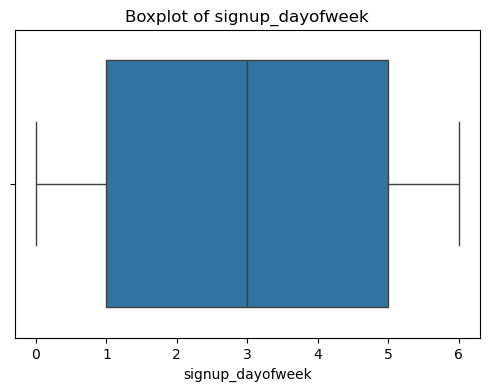

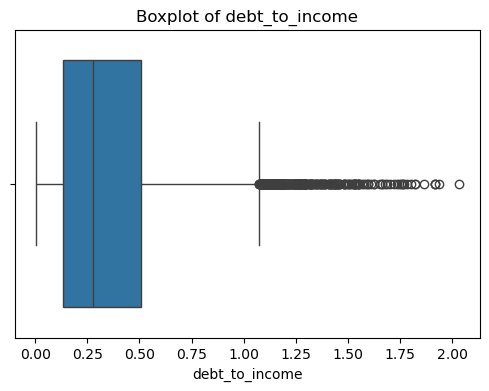

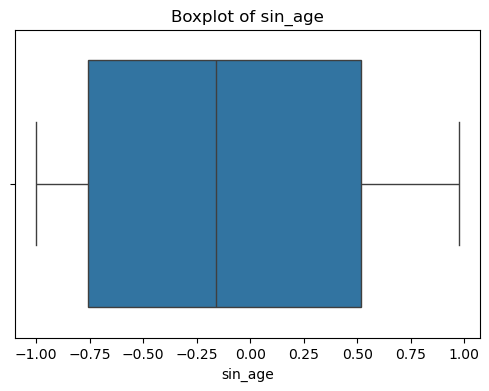

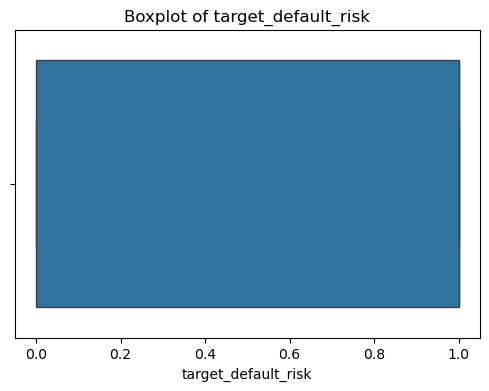

In [13]:
# Boxplots for each numeric column
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### - Analyze categorical variables (bar charts, value counts).

In [15]:
# Loop through categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())   # counts of each category


Value counts for customer_id:
customer_id
CUST006253    1
CUST001238    1
CUST001308    1
CUST009430    1
CUST000999    1
             ..
CUST002729    1
CUST009598    1
CUST004986    1
CUST006847    1
CUST007271    1
Name: count, Length: 10000, dtype: int64

Value counts for home_ownership:
home_ownership
RENT        4524
OWN         2526
MORTGAGE    2498
OTHER        452
Name: count, dtype: int64

Value counts for education:
education
Bachelors    4443
HS           2546
Masters      1962
Other         500
PhD           462
Bachlors       87
Name: count, dtype: int64

Value counts for marital_status:
marital_status
Single      4486
Married     4002
Divorced    1000
Widowed      512
Name: count, dtype: int64

Value counts for region:
region
East     2553
South    2523
North    2479
West     2445
Name: count, dtype: int64

Value counts for signup_date:
signup_date
2018-06-22    14
2021-04-14    13
2021-01-27    13
2021-11-14    13
2022-05-07    12
              ..
2023-04-16     1
2022

In [16]:
# Categorical analysis
cat_cols = df.select_dtypes(include=['object']).columns.drop(['customer_id'], errors='ignore')
for col in cat_cols:
    print(f"\n{col}: {df[col].value_counts().to_dict()}")
 


home_ownership: {'RENT': 4524, 'OWN': 2526, 'MORTGAGE': 2498, 'OTHER': 452}

education: {'Bachelors': 4443, 'HS': 2546, 'Masters': 1962, 'Other': 500, 'PhD': 462, 'Bachlors': 87}

marital_status: {'Single': 4486, 'Married': 4002, 'Divorced': 1000, 'Widowed': 512}

region: {'East': 2553, 'South': 2523, 'North': 2479, 'West': 2445}

signup_date: {'2018-06-22': 14, '2021-04-14': 13, '2021-01-27': 13, '2021-11-14': 13, '2022-05-07': 12, '2018-03-13': 12, '2019-07-17': 12, '2021-06-02': 12, '2021-07-06': 12, '2023-01-13': 12, '2021-10-04': 11, '2021-08-22': 11, '2019-02-10': 11, '2019-02-14': 11, '2022-12-10': 11, '2020-03-28': 11, '2022-03-16': 11, '2018-12-28': 11, '2021-07-31': 11, '2018-06-10': 11, '2019-02-07': 11, '2022-12-03': 11, '2021-04-09': 11, '2018-05-25': 10, '2022-01-08': 10, '2021-02-14': 10, '2018-12-31': 10, '2019-06-17': 10, '2019-03-14': 10, '2022-01-24': 10, '2020-11-21': 10, '2020-02-06': 10, '2018-06-04': 10, '2022-03-27': 10, '2022-04-22': 10, '2022-08-11': 10, '202

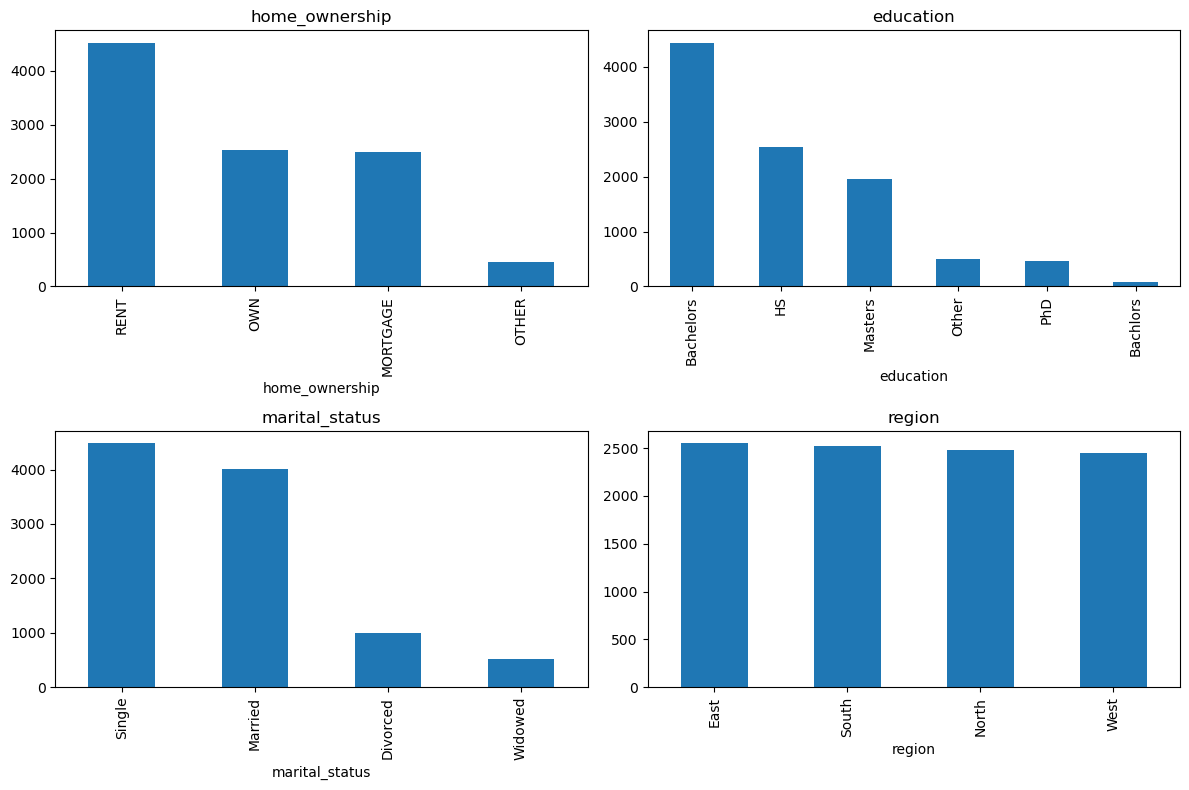

In [17]:
# Categorical visualizations  
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(cat_cols[:4]):
    df[col].value_counts().plot(kind='bar', ax=axes.flat[i], title=col)
plt.tight_layout()
plt.show()

#### - Detect outliers and discuss strategies to handle them

In [19]:
# # Using IQR method
# for col in df.select_dtypes(include=['number']).columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
#     print(f"{col}: {len(outliers)} outliers")


upper_limit = df['age'].mean() + 3 * df['age'].std()
lower_limit = df['age'].mean() - 3 * df['age'].std()

print(upper_limit)
print(lower_limit)

df['age'] = np.where(
    df['age']> upper_limit,
    upper_limit,
    np.where(
        df['age'] < lower_limit,
        lower_limit,
        df['age']
    )
)

95.23556062459227
-3.5123606245922545


#### - Explore correlations (heatmap, pairplot).

In [21]:
A = df.corr(numeric_only =True)

<Axes: >

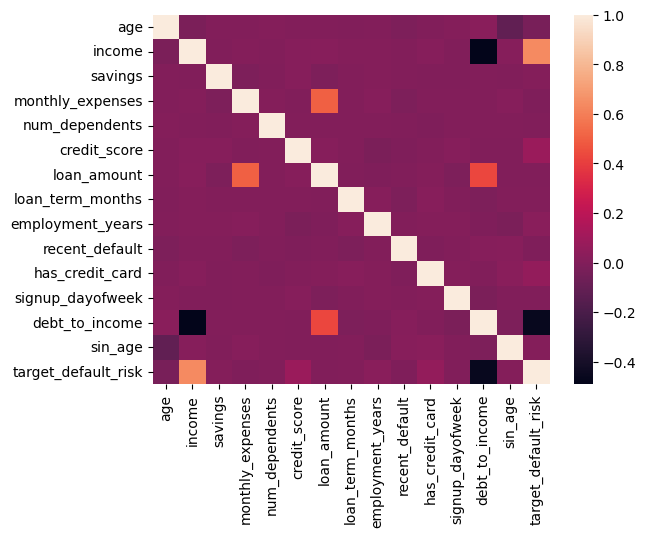

In [22]:
sns.heatmap(A)

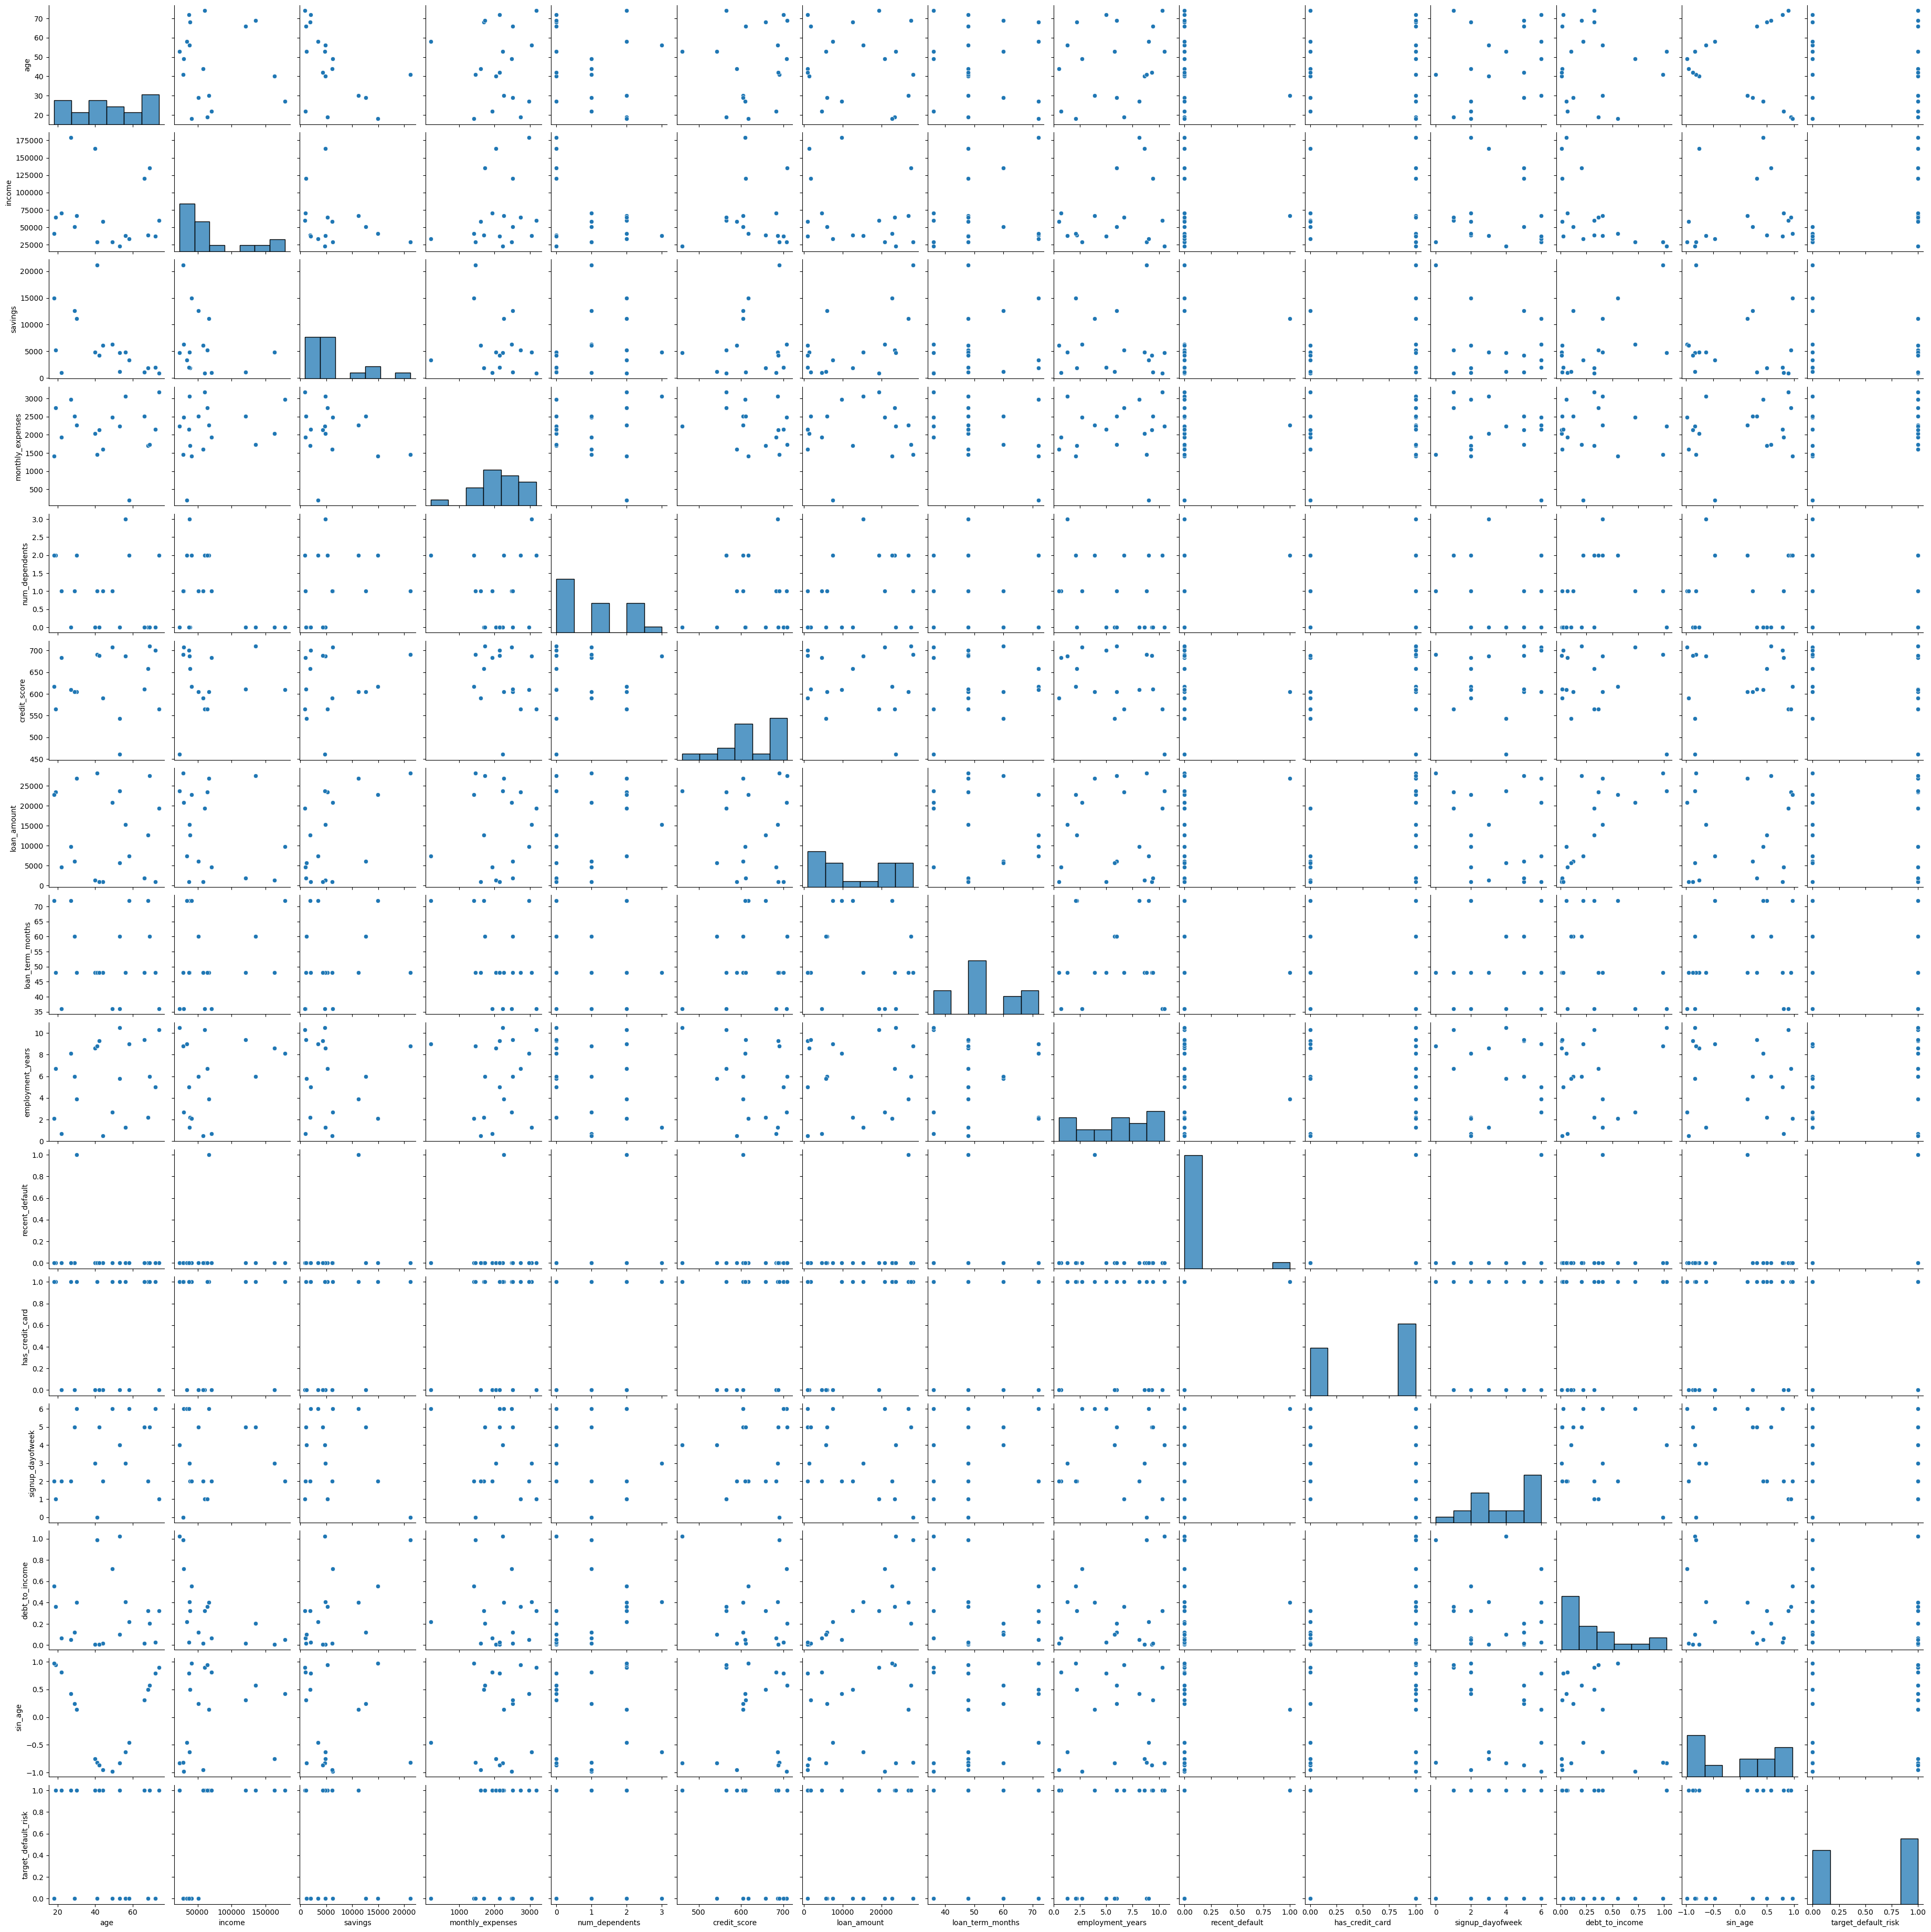

In [23]:
sns.pairplot(data=df.head(20))

#### -  Look at class balance in `target_default_risk`.

In [25]:
# # Count plot
# df['target_default_risk'].value_counts()

# Target analysis (robust)
TARGET_COLUMN = "target_default_risk"  # Define locally if not available
target_dist = df[TARGET_COLUMN].value_counts()
print(f"Target distribution:\n{target_dist}")
print(f"Balance: {(target_dist / len(df) * 100).round(1).to_dict()}")

Target distribution:
target_default_risk
1    5132
0    4868
Name: count, dtype: int64
Balance: {1: 51.3, 0: 48.7}


## 2. Data Preprocessing

In [27]:
# Create working copy and reset index
df_copy = df.copy()

##### * Missing values and categorical data cleaned

In [29]:
# TASK 1: HANDLE MISSING VALUES (IMPUTATION STRATEGIES)
# TASK 2: FIX CATEGORICAL INCONSISTENCIES (EDUCATION TYPOS)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_cols = df_copy.select_dtypes(include=[np.number]).columns[df_copy.select_dtypes(include=[np.number]).isnull().any()]
cat_cols = df_copy.select_dtypes(include=['object']).columns[df_copy.select_dtypes(include=['object']).isnull().any()]

# TASK 1: Missing Value Imputation
if len(num_cols) > 0:
    df_copy[num_cols] = SimpleImputer(strategy='median').fit_transform(df_copy[num_cols])
if len(cat_cols) > 0:
    df_copy[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df_copy[cat_cols])

# TASK 2: Fix Education Typos
edu_map = {'Bachlors': 'Bachelor', 'Bachelors': 'Bachelor', 'HS': 'High School', 'Masters': 'Master', 'Phd': 'PhD'}
df_copy['education'] = df_copy['education'].map(edu_map).fillna(df_copy['education'])

print("✓ Missing values and categorical data cleaned")

✓ Missing values and categorical data cleaned


#### - Handle missing values (imputation strategies).

In [31]:
from sklearn.impute import SimpleImputer

# TASK 1: Missing Value Imputation
numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
categorical_cols = df_copy.select_dtypes(include=['object']).columns

# Impute missing values
df_copy[numeric_cols] = SimpleImputer(strategy='median').fit_transform(df_copy[numeric_cols])
df_copy[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df_copy[categorical_cols])

missing_values = df_copy.isnull().sum().sum()
print(f"✓ Missing values handled: {missing_values == 0} (Count: {missing_values})")

✓ Missing values handled: True (Count: 0)


#### - Fix categorical inconsistencies (e.g., typos in `education` like "Bachlors").

In [33]:
# Define inconsistency mappings for different categorical columns
categorical_fixes = {
    'education': {
        'Bachlors': 'Bachelor', 'Bachelors': 'Bachelor', 
        'HS': 'High School', 'Masters': 'Master', 'Phd': 'PhD'
    },
    'home_ownership': {
        'rent': 'Rent', 'own': 'Own', 'mortgage': 'Mortgage',
        'RENT': 'Rent', 'OWN': 'Own', 'MORTGAGE': 'Mortgage'
    },
    'marital_status': {
        'single': 'Single', 'married': 'Married', 'divorced': 'Divorced',
        'SINGLE': 'Single', 'MARRIED': 'Married', 'DIVORCED': 'Divorced'
    },
    'region': {
        'north': 'North', 'south': 'South', 'east': 'East', 'west': 'West',
        'NORTH': 'North', 'SOUTH': 'South', 'EAST': 'East', 'WEST': 'West'
    }
}

# Apply fixes to categorical columns
fixes_applied = {}
for col in df_copy.select_dtypes(include=['object']).columns:
    if col in categorical_fixes and col != 'customer_id':
        original_count = df_copy[col].nunique()
        df_copy[col] = df_copy[col].replace(categorical_fixes[col])
        new_count = df_copy[col].nunique()
        
        if original_count != new_count:
            fixes_applied[col] = len(categorical_fixes[col])

# Report results
if fixes_applied:
    print("✓ Categorical inconsistencies fixed:")
    for col, fix_count in fixes_applied.items():
        print(f"   {col}: {fix_count} fixes applied")
else:
    print("✓ No categorical inconsistencies found")

print(f"✓ All categorical data standardized")

✓ No categorical inconsistencies found
✓ All categorical data standardized


#### - Outlier treatment (winsorization, capping, or removal).
#### -- Encode categorical variable

In [35]:
#  TASK 6: OUTLIER TREATMENT (WINSORIZATION, CAPPING, OR REMOVAL)
#  TASK 3: ENCODE CATEGORICAL VARIABLES (ORDINAL ENCODING - PART 1)
from sklearn.preprocessing import StandardScaler
 
# TASK 6: Outlier Treatment using IQR Capping
outlier_cols = ['income', 'savings', 'monthly_expenses', 'loan_amount', 'credit_score']
for col in outlier_cols:
    if col in df_copy.columns:
        Q1, Q3 = df_copy[col].quantile([0.25, 0.75])
        df_copy[col] = df_copy[col].clip(Q1 - 1.5*(Q3-Q1), Q3 + 1.5*(Q3-Q1))
 
# TASK 3: Ordinal Encoding for Education (ordered categorical)
edu_order = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4, 'Other': 0}
df_copy['education_encoded'] = df_copy['education'].map(edu_order)
 
print(f"✓ Outliers treated and education encoded. Shape: {df_copy.shape}")
 

✓ Outliers treated and education encoded. Shape: (10000, 22)


#### - Create or transform features if useful (e.g., income per dependent, recency from `signup_date`).

In [37]:
# TASK 5: CREATE OR TRANSFORM FEATURES (INCOME PER DEPENDENT, RECENCY FROM SIGNUP_DATE)
# Date-based feature engineering
df_copy['signup_date'] = pd.to_datetime(df_copy['signup_date'])
df_copy['signup_year'] = df_copy['signup_date'].dt.year
df_copy['signup_month'] = df_copy['signup_date'].dt.month
df_copy['signup_quarter'] = df_copy['signup_date'].dt.quarter
df_copy['days_since_signup'] = (pd.Timestamp.now() - df_copy['signup_date']).dt.days
df_copy['months_since_signup'] = df_copy['days_since_signup'] / 30

# Financial ratio features
df_copy['income_per_dependent'] = df_copy['income'] / (df_copy['num_dependents'] + 1)
df_copy['savings_ratio'] = df_copy['savings'] / (df_copy['income'] + 1)
df_copy['expense_ratio'] = df_copy['monthly_expenses'] / (df_copy['income'] + 1)
df_copy['savings_to_income_ratio'] = df_copy['savings'] / (df_copy['income'] + 1)
df_copy['expense_to_income_ratio'] = df_copy['monthly_expenses'] / (df_copy['income'] + 1)
df_copy['loan_to_income_ratio'] = df_copy['loan_amount'] / (df_copy['income'] + 1)

# Binary indicator features
df_copy['high_debt'] = (df_copy['debt_to_income'] > 0.4).astype(int)
df_copy['low_credit'] = (df_copy['credit_score'] < 600).astype(int)
df_copy['high_debt_to_income'] = (df_copy['debt_to_income'] > 0.4).astype(int)
df_copy['low_credit_score'] = (df_copy['credit_score'] < 600).astype(int)
df_copy['high_loan_amount'] = (df_copy['loan_amount'] > df_copy['loan_amount'].quantile(0.75)).astype(int)

# Age grouping for additional encoding
df_copy['age_group'] = pd.cut(df_copy['age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Middle', 'Senior', 'Elder'])

print("✓ Feature engineering completed")

✓ Feature engineering completed


#### - Encode categorical variables (one-hot encoding / ordinal encoding).
#### - Scale numeric features (StandardScaler/MinMaxScaler for algorithms like Logistic Regression, SVM).

In [39]:
#  TASK 3: ENCODE CATEGORICAL VARIABLES (ONE-HOT ENCODING / ORDINAL ENCODING - FINAL)
#  TASK 4: SCALE NUMERIC FEATURES (STANDARDSCALER FOR ALGORITHMS LIKE LOGISTIC REGRESSION, SVM)
from sklearn.preprocessing import StandardScaler

# TASK 3: Complete Categorical Encoding
# Encode age_group (now that it exists)
age_group_order = {'Young': 1, 'Middle': 2, 'Senior': 3, 'Elder': 4}
df_copy['age_group_encoded'] = df_copy['age_group'].map(age_group_order)

# Check which categorical columns still exist before one-hot encoding
categorical_cols_to_encode = ['home_ownership', 'marital_status', 'region']
existing_categorical_cols = [col for col in categorical_cols_to_encode if col in df_copy.columns]

if existing_categorical_cols:
    df_copy = pd.get_dummies(df_copy, columns=existing_categorical_cols, drop_first=True, dtype=int)
    print(f"✓ One-hot encoded: {existing_categorical_cols}")
else:
    print("✓ Categorical columns already encoded or not found")

# TASK 4: Scale All Numeric Features
TARGET_COLUMN = "target_default_risk"
scale_cols = df_copy.select_dtypes(include=[np.number]).columns.drop([TARGET_COLUMN, 'customer_id'], errors='ignore')
df_copy[scale_cols] = StandardScaler().fit_transform(df_copy[scale_cols])

print(f"✓ Final encoding and scaling completed. Shape: {df_copy.shape}")

✓ One-hot encoded: ['home_ownership', 'marital_status', 'region']
✓ Final encoding and scaling completed. Shape: (10000, 46)


In [40]:
#  FINAL PREPROCESSING SUMMARY

print(f"""
 DATASET TRANSFORMATION:
• Original shape: (10,000, 21) → Final shape: {df_copy.shape}
• Features added: {df_copy.shape[1] - 21}
• Missing values: {df_copy.isnull().sum().sum()}

""")


 DATASET TRANSFORMATION:
• Original shape: (10,000, 21) → Final shape: (10000, 46)
• Features added: 25
• Missing values: 0




## 3. Model Building
### Train and evaluate the following models :
 - 1. **Logistic Regression**
 - 2. **Decision Tree**
 - 3. **Support Vector Machine (SVM)**
 - 4. **Random Forest**
 - 5. **XGBoost**

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import xgboost as xgb

TARGET_COLUMN = "target_default_risk"
X = df_copy.drop([TARGET_COLUMN, 'customer_id'], axis=1, errors='ignore')
y = df_copy[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f" Data split completed:")
print(f" Training set: {X_train.shape[0]} samples")
print(f" Test set: {X_test.shape[0]} samples")
print(f" Features: {X_train.shape[1]}")
print(f" Target distribution in train: {y_train.value_counts(normalize=True).round(3).to_dict()}")

 Data split completed:
 Training set: 7000 samples
 Test set: 3000 samples
 Features: 44
 Target distribution in train: {1.0: 0.513, 0.0: 0.487}


In [43]:
# Identify problematic columns (non-numeric)
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print(f"\n  Non-numeric columns found: {non_numeric_cols}")
    print("  These need to be removed for ML models...")
    
    # Remove all non-numeric columns
    X_train_clean = X_train.select_dtypes(include=[np.number])
    X_test_clean = X_test.select_dtypes(include=[np.number])
    
    print(f"  Removed non-numeric columns. New shape: {X_train_clean.shape}")
else:
    X_train_clean = X_train
    X_test_clean = X_test
    print("All columns are numeric")


  Non-numeric columns found: ['education', 'signup_date', 'age_group', 'age_group_encoded']
  These need to be removed for ML models...
  Removed non-numeric columns. New shape: (7000, 40)


#### - Model Training and Evaluate using **accuracy, precision, recall, F1-score, confusion matrix**.


In [45]:
# MODEL TRAINING AND EVALUATION
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),

    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=0, eval_metric='error',max_depth=5,n_estimators=100,eta= 0.1)

}

    
# Train and evaluate each model

results = {}
print("TRAINING AND EVALUATING MODELS")


for name, model in models.items():
    print(f"\n Training {name}...")
    
    # Train model with cleaned data
    model.fit(X_train_clean, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_clean)
    y_pred_proba = model.predict_proba(X_test_clean)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate all required metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_score': auc,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Display metrics
    print(f"   ✅ Accuracy:  {accuracy:.4f}")
    print(f"   ✅ Precision: {precision:.4f}")
    print(f"   ✅ Recall:    {recall:.4f}")
    print(f"   ✅ F1-Score:  {f1:.4f}")
    if auc:
        print(f"   ✅ AUC Score: {auc:.4f}")

TRAINING AND EVALUATING MODELS

 Training Logistic Regression...
   ✅ Accuracy:  0.9360
   ✅ Precision: 0.9674
   ✅ Recall:    0.9058
   ✅ F1-Score:  0.9356
   ✅ AUC Score: 0.9581

 Training Decision Tree...
   ✅ Accuracy:  0.9153
   ✅ Precision: 0.9270
   ✅ Recall:    0.9065
   ✅ F1-Score:  0.9166
   ✅ AUC Score: 0.9156

 Training SVM...
   ✅ Accuracy:  0.9273
   ✅ Precision: 0.9584
   ✅ Recall:    0.8974
   ✅ F1-Score:  0.9269
   ✅ AUC Score: 0.9671

 Training Random Forest...
   ✅ Accuracy:  0.9313
   ✅ Precision: 0.9581
   ✅ Recall:    0.9058
   ✅ F1-Score:  0.9312
   ✅ AUC Score: 0.9768

 Training XGBoost...
   ✅ Accuracy:  0.9473
   ✅ Precision: 0.9594
   ✅ Recall:    0.9370
   ✅ F1-Score:  0.9481
   ✅ AUC Score: 0.9833


#### - DETAILED CONFUSION MATRICES

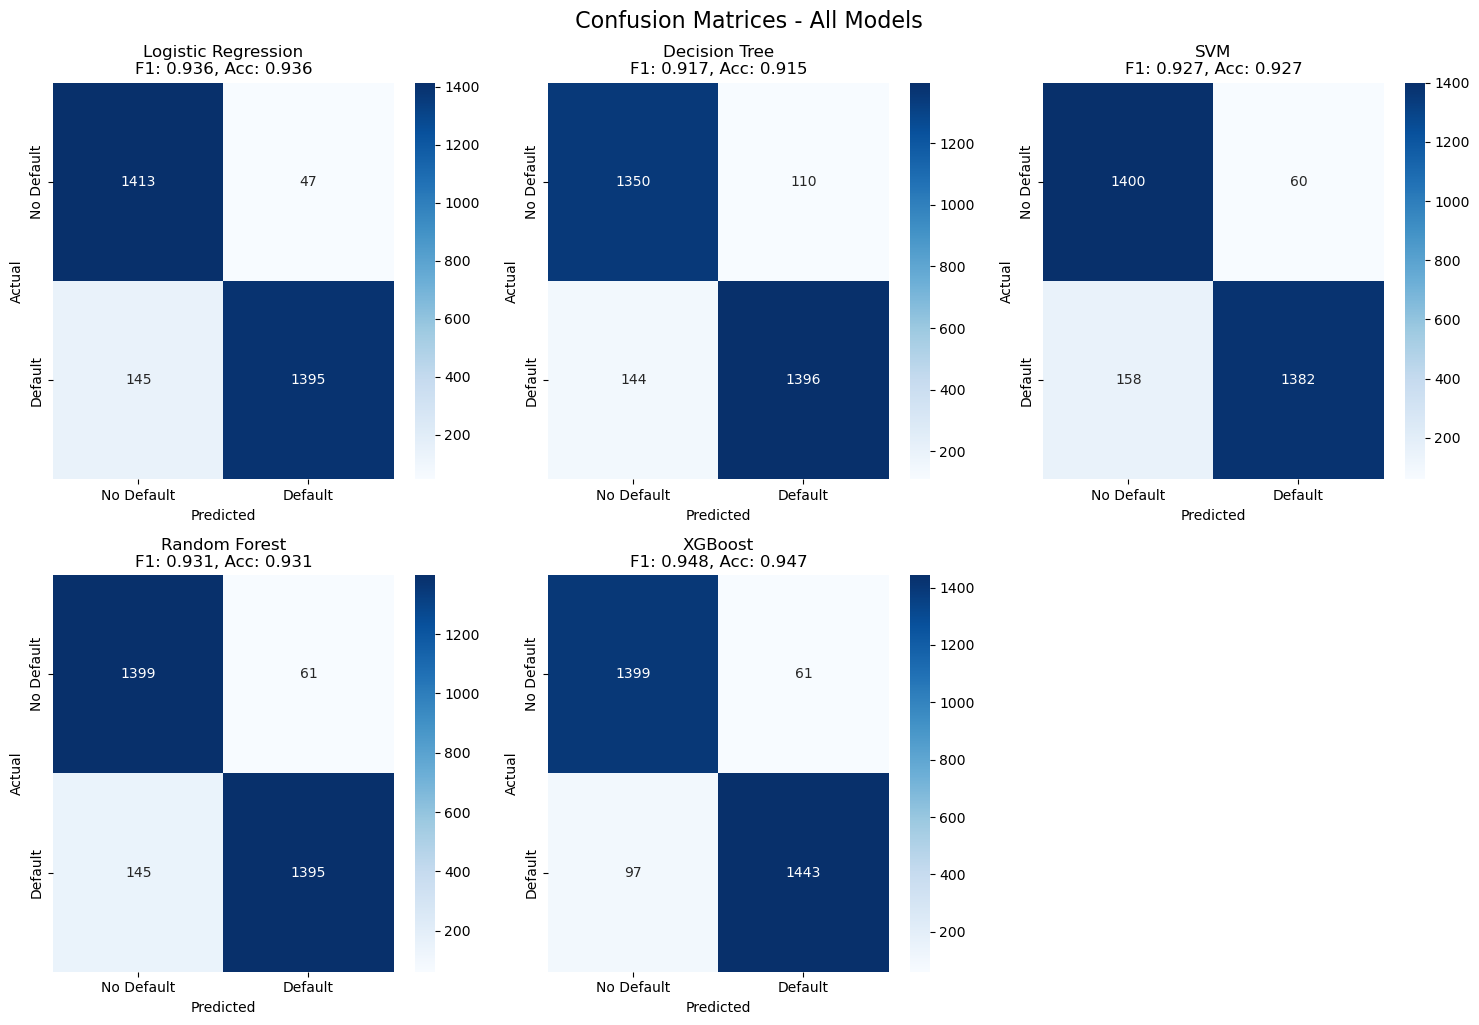

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (name, result) in enumerate(results.items()):
    if i < len(axes):
        cm = result['confusion_matrix']
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['No Default', 'Default'],
                   yticklabels=['No Default', 'Default'],
                   ax=axes[i])
        
        axes[i].set_title(f'{name}\nF1: {result["f1_score"]:.3f}, Acc: {result["accuracy"]:.3f}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

# Hide the last subplot if we have fewer than 6 models
if len(results) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.suptitle(' Confusion Matrices - All Models', fontsize=16, y=1.02)
plt.show()

## 4. Hyperparameter Tuning

In [49]:
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}


top_models = sorted(results.items(), key=lambda x: x[1]['auc_score'], reverse=True)[:2]
tuned_models = {}

for name, result in top_models:
    if name in param_grids:
        print(f"Hyperparameter tuning for {name}...")
        
        if name == 'Random Forest':
            grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                              param_grids[name], cv=3, scoring='roc_auc', n_jobs=-1)

            
        else:
            grid = RandomizedSearchCV(xgb.XGBClassifier(random_state=0, eval_metric='error'), 
                                    param_grids[name], cv=3, scoring='roc_auc', n_jobs=-1,n_iter = 10)

        
        grid.fit(X_train_clean, y_train)
        y_pred_tuned = grid.predict(X_test_clean)
        y_pred_proba_tuned = grid.predict_proba(X_test_clean)[:, 1]
        
        tuned_models[name] = {
            'accuracy': accuracy_score(y_test, y_pred_tuned),
            'auc_score': roc_auc_score(y_test, y_pred_proba_tuned),
            'best_params': grid.best_params_,
            'model': grid.best_estimator_
        }
        
        print(f"   Best AUC: {tuned_models[name]['auc_score']:.4f}")
        print(f"   Best params: {tuned_models[name]['best_params']}")

print("\n✅ Hyperparameter tuning completed!")

Hyperparameter tuning for XGBoost...
   Best AUC: 0.9828
   Best params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
Hyperparameter tuning for Random Forest...
   Best AUC: 0.9773
   Best params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

✅ Hyperparameter tuning completed!


In [50]:
all_results = {**results, **tuned_models}

results_df = pd.DataFrame({
    'Model': list(all_results.keys()),
    'Accuracy': [all_results[model]['accuracy'] for model in all_results.keys()],
    'AUC Score': [all_results[model]['auc_score'] for model in all_results.keys()]
})

results_df = results_df.sort_values('AUC Score', ascending=False)
print(" Model Performance Comparison:")
print(results_df.round(4))

best_model_name = results_df.iloc[0]['Model']
best_model = all_results[best_model_name]['model']

print(f"\n Best Model: {best_model_name}")
print(f"   Best AUC Score: {results_df.iloc[0]['AUC Score']:.4f}")
print(f"   Best Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")

y_pred = best_model.predict(X_test_clean)
y_pred_proba = best_model.predict_proba(X_test_clean)[:, 1]

print(f"\n Detailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(f"\n Confusion Matrix:")
print(cm)

 Model Performance Comparison:
                 Model  Accuracy  AUC Score
4              XGBoost    0.9463     0.9828
3        Random Forest    0.9290     0.9773
2                  SVM    0.9273     0.9671
0  Logistic Regression    0.9360     0.9581
1        Decision Tree    0.9153     0.9156

 Best Model: XGBoost
   Best AUC Score: 0.9828
   Best Accuracy: 0.9463

 Detailed Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1460
         1.0       0.96      0.94      0.95      1540

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000


 Confusion Matrix:
[[1399   61]
 [ 100 1440]]
